# Introduction

(KR) 여러 개의 데이터셋을 병합하여 원하는 형태로 전처리 하고자 한 경험이 있으실 겁니다. 

(EN) You may have experience trying to merge multiple datasets and preprocess them into the desired form.

(KR) 예를 들면, 운영중인 카페 A와 카페 B에서 각 메뉴별 판매량을 집계하고자 한다고 해보겠습니다. 

(EN) For example, let's say that you want to aggregate the sales of each menu at cafe A and cafe B that you own.

(KR) 물론 DB에서는 간단한 쿼리를 통해 해결할 수 있는 문제지만, 날짜별로 정렬한 뒤 어떠한 형태로 시각화하여 추세(Trend)를 파악하고자 할 경우에는 쿼리만으로 해결할 수 없을 겁니다.

(EN) Of course, it can be solved through a simple query in the database, but if you want to sort by date and visualize it to see the trend, you won't be able to solve it by query alone.

(KR) 그래서 본 예제에서는 아주 간단하게 몇 가지 데이터셋을 병합한 뒤 일자별, 주별, 월별 판매량을 파악 해보겠습니다.

(EN) So in this example, I'm going to merge two datasets very simply, and then visualize the sales by date, week, and month.

(KR) 다만 데이터 전처리와 시각화 그 자체에만 목적을 둔 예제이므로, Kaggle에서 다운로드 받은 전혀 다른 두 개의 데이터셋을 사용하겠습니다.

(EN) However, since this is an tutorial of data preprocessing and visualization itself, i will use two completely different datasets downloaded from Kaggle.

# Dataset

(KR) 서론에서 얘기한 것처럼 전혀 다른 두 개의 데이터셋을 활용하고, 날짜 구간만 맞춰서 사용하겠습니다. 

(EN) As I mentioned in the introduction, use two completely different datasets, and use only the same date interval.

(KR) 따로 사용하고자 하는 데이터가 있다면 하단 데이터 전처리 파트에서 컬럼명만 변경 해주시면 됩니다.

(EN) If you want to use the data separately, just change the column name in the data preprocessing part below.

1. us_counties_covid19_daily.csv - https://www.kaggle.com/datasets/sudalairajkumar/covid19-in-usa

2. covid19_italy_province.csv - https://www.kaggle.com/datasets/sudalairajkumar/covid19-in-italy

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Preprocessing

In [2]:
path = '{Input_your_own_path}'
data_1 = 'us_counties_covid19_daily.csv'
data_2=  'covid19_italy_province.csv'

# (KR) 그리고 아래 변수에는 집계하고자 하는 데이터의 컬럼명을 적어주세요
# (EN) declare the column name of the data you want to aggregate.
select_column_name = 'some_column_name' 

Data 1

In [3]:
# Check  Data 1 
df_1 = pd.read_csv(path+data_1,encoding = 'utf-8')
df_1
# From 2020-01-21 ~ 2020-12-05

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0
...,...,...,...,...,...,...
800432,2020-12-05,Sweetwater,Wyoming,56037.0,2098,10.0
800433,2020-12-05,Teton,Wyoming,56039.0,1739,2.0
800434,2020-12-05,Uinta,Wyoming,56041.0,1187,5.0
800435,2020-12-05,Washakie,Wyoming,56043.0,519,8.0


In [4]:
extractd_df_1 = df_1[['date','county']]
extractd_df_1.head()

,date,county
0,2020-01-21,Snohomish
1,2020-01-22,Snohomish
2,2020-01-23,Snohomish
3,2020-01-24,Cook
4,2020-01-24,Snohomish


In [5]:
# Null Check
extractd_df_1.isnull().sum()

date      0
county    0
dtype: int64

In [6]:
# Check Null Instance
extractd_df_1[extractd_df_1.date.isna()]

,date,county


In [7]:
# Change Date Column to Datetime form
extractd_df_1 = extractd_df_1.dropna(axis=0)
extractd_df_1['date'] = pd.to_datetime(extractd_df_1['date'], infer_datetime_format=True)
extractd_df_1

,date,county
0,2020-01-21,Snohomish
1,2020-01-22,Snohomish
2,2020-01-23,Snohomish
3,2020-01-24,Cook
4,2020-01-24,Snohomish
...,...,...
800432,2020-12-05,Sweetwater
800433,2020-12-05,Teton
800434,2020-12-05,Uinta
800435,2020-12-05,Washakie


In [8]:
# If the column name is not date, please change it to date.
# select_column_name = 'some_column_name' 
extractd_df_1.columns = ['date',select_column_name]
extractd_df_1

,date,some_column_name
0,2020-01-21,Snohomish
1,2020-01-22,Snohomish
2,2020-01-23,Snohomish
3,2020-01-24,Cook
4,2020-01-24,Snohomish
...,...,...
800432,2020-12-05,Sweetwater
800433,2020-12-05,Teton
800434,2020-12-05,Uinta
800435,2020-12-05,Washakie


Data 2

In [9]:
# Check  Data 1 
df_2 = pd.read_csv(path+data_2,encoding = 'utf-8')
df_2
# From 2020-02-24 ~ 2022-12-06
# Therefore, it can be seen that the same date interval as data 1 must be matched.

,SNo,Date,Country,RegionCode,RegionName,ProvinceCode,ProvinceName,ProvinceAbbreviation,Latitude,Longitude,TotalPositiveCases
0,0,2020-02-24T18:00:00,ITA,13,Abruzzo,66,L'Aquila,AQ,42.351222,13.398438,0
1,1,2020-02-24T18:00:00,ITA,13,Abruzzo,67,Teramo,TE,42.658918,13.704400,0
2,2,2020-02-24T18:00:00,ITA,13,Abruzzo,68,Pescara,PE,42.464584,14.213648,0
3,3,2020-02-24T18:00:00,ITA,13,Abruzzo,69,Chieti,CH,42.351032,14.167546,0
4,4,2020-02-24T18:00:00,ITA,13,Abruzzo,979,In fase di definizione/aggiornamento,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
40196,40196,2020-12-06T17:00:00,ITA,5,Veneto,27,Venezia,VE,45.434905,12.338452,24142
40197,40197,2020-12-06T17:00:00,ITA,5,Veneto,28,Padova,PD,45.406930,11.876087,31073
40198,40198,2020-12-06T17:00:00,ITA,5,Veneto,29,Rovigo,RO,45.071073,11.790070,4577
40199,40199,2020-12-06T17:00:00,ITA,5,Veneto,899,Fuori Regione / Provincia Autonoma,NaN,NaN,NaN,2809


In [10]:
extracted_df_2 = df_2[['Date','ProvinceName']]
extracted_df_2.tail() 

,Date,ProvinceName
40196,2020-12-06T17:00:00,Venezia
40197,2020-12-06T17:00:00,Padova
40198,2020-12-06T17:00:00,Rovigo
40199,2020-12-06T17:00:00,Fuori Regione / Provincia Autonoma
40200,2020-12-06T17:00:00,In fase di definizione/aggiornamento


In [11]:
# Null Check
extracted_df_2.isnull().sum()

Date            0
ProvinceName    0
dtype: int64

In [12]:
# Check Null Instance
# extractd_df_2[extractd_df_2.date.isna()].head()

In [13]:
# Change Date Column to Datetime form
extracted_df_2 = extracted_df_2.dropna(axis=0)
extracted_df_2['Date'] = pd.to_datetime(extracted_df_2['Date'], infer_datetime_format=True)
extracted_df_2.isnull().sum() # remove null

Date            0
ProvinceName    0
dtype: int64

In [14]:
extracted_df_2.columns = ['date',select_column_name]
extracted_df_2

# change datetime format 

#extracted_df_2['date'] = pd.to_datetime(extracted_df_2['date'], infer_datetime_format=True)

extracted_df_2['date'] = extracted_df_2['date'].dt.strftime('%Y-%m-%d')
extracted_df_2['date'] = pd.to_datetime(extracted_df_2['date'],infer_datetime_format=True)

In [15]:
# match the date interval 

# Data 1 - 2020-01-21 ~ 2020-12-05
# Data 2 - 2020-02-24 ~ 2020-12-06
matched_df_1 = extractd_df_1[extractd_df_1['date'].isin(pd.date_range('2020-02-24','2020-12-05'))]
matched_df_2 = extracted_df_2[extracted_df_2['date'].isin(pd.date_range('2020-02-24','2020-12-05'))]
matched_df_2

,date,some_column_name
0,2020-02-24,L'Aquila
1,2020-02-24,Teramo
2,2020-02-24,Pescara
3,2020-02-24,Chieti
4,2020-02-24,In fase di definizione/aggiornamento
...,...,...
40047,2020-12-05,Venezia
40048,2020-12-05,Padova
40049,2020-12-05,Rovigo
40050,2020-12-05,Fuori Regione / Provincia Autonoma


# Merge dataframe

In [16]:
concat_df = pd.concat([matched_df_1,matched_df_2],ignore_index=True)
concat_df

,date,some_column_name
0,2020-02-24,Maricopa
1,2020-02-24,Humboldt
2,2020-02-24,Los Angeles
3,2020-02-24,Orange
4,2020-02-24,Sacramento
...,...,...
840203,2020-12-05,Venezia
840204,2020-12-05,Padova
840205,2020-12-05,Rovigo
840206,2020-12-05,Fuori Regione / Provincia Autonoma


In [17]:
# If you want to filtering some data, use this line

# mask  = concat_df[column_name].isin(['something_1','something_2','something_3'])
# concat_df = concat_df[~mask]

# Daily Count

In [18]:
# remove duplicate values
concat_df_daily = concat_df.groupby('date')[select_column_name].nunique()
concat_df_daily

date
2020-02-24     124
2020-02-25     125
2020-02-26     128
2020-02-27     128
2020-02-28     130
              ... 
2020-12-01    2038
2020-12-02    2038
2020-12-03    2038
2020-12-04    2038
2020-12-05    2038
Name: some_column_name, Length: 286, dtype: int64

In [19]:
concat_df_daily = pd.DataFrame(concat_df_daily)
concat_df_daily = concat_df_daily.reset_index()
concat_df_daily

,date,some_column_name
0,2020-02-24,124
1,2020-02-25,125
2,2020-02-26,128
3,2020-02-27,128
4,2020-02-28,130
...,...,...
281,2020-12-01,2038
282,2020-12-02,2038
283,2020-12-03,2038
284,2020-12-04,2038


In [20]:
df_unique = pd.DataFrame(concat_df_daily)
df_unique = df_unique.reset_index()
df_unique
df_unique['get_ma_5_days'] = df_unique[select_column_name].rolling(5).mean() 
df_unique
# df_unique = df_unique.reset_index()


,index,date,some_column_name,get_ma_5_days
0,0,2020-02-24,124,NaN
1,1,2020-02-25,125,NaN
2,2,2020-02-26,128,NaN
3,3,2020-02-27,128,NaN
4,4,2020-02-28,130,127.0
...,...,...,...,...
281,281,2020-12-01,2038,2038.0
282,282,2020-12-02,2038,2038.0
283,283,2020-12-03,2038,2038.0
284,284,2020-12-04,2038,2038.0


In [21]:
# If you want to download csv file 
# df_unique.to_csv('filename_daily.csv')

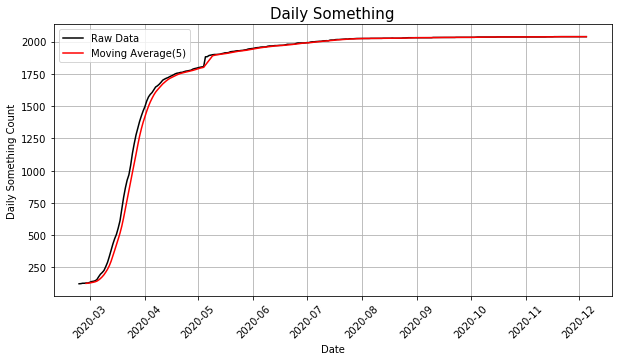

In [22]:
d_ = df_unique
plt.figure(figsize=(10,5))
plt.title("Daily Something", fontsize=15)
plt.plot(d_["date"],d_[select_column_name], "-", color = 'black',label='Raw Data')
plt.plot(d_["date"],d_['get_ma_5_days'],color = 'red',label = 'Moving Average(5)')
plt.xlabel('Date')
plt.ylabel('Daily Something Count')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

;; 사실 사용한 데이터셋에서 코로나 발생 주 (State) 개수를 카운트 하다보니 코로나가 정점을 찍은 일정 시점부터는 모든 주에서 발생할테니 이평선이 의미가 없는 데이터가 됨;;

# Weekly Count

(KR) 주별 카운트는 실제 7일 기준으로 할지, 캘린더상의 일주일 기준으로 할지에 따라 선택 가능 

(EN) The weekly count can be selected based on whether it is based on actual 7 days or a week on the calendar.

In [23]:
# 1 
concat_df_weekly = concat_df.groupby([pd.Grouper(key='date',freq='7D')])[select_column_name].apply(list)
concat_df_weekly = pd.DataFrame(concat_df_weekly).reset_index()
concat_df_weekly.head()


,date,some_column_name
0,2020-02-24,"[Maricopa, Humboldt, Los Angeles, Orange, Sacr..."
1,2020-03-02,"[Maricopa, Alameda, Humboldt, Los Angeles, Mar..."
2,2020-03-09,"[Maricopa, Pima, Pinal, Alameda, Contra Costa,..."
3,2020-03-16,"[Baldwin, Elmore, Jefferson, Lee, Limestone, M..."
4,2020-03-23,"[Baldwin, Calhoun, Chambers, Cullman, Elmore, ..."


In [24]:
# 2 
# concat_df_weekly = concat_df.groupby([pd.Grouper(key='date',freq='W')])[select_column_name].apply(list)
# concat_df_weekly = pd.DataFrame(concat_df_weekly).reset_index()
# concat_df_weekly.head()

In [25]:
# I'll use # 1, actual 7 days
some_list = list(concat_df_weekly[select_column_name])

In [26]:
test_count_col = []
for data in some_list: 
    tmp = len(list(set(data)))
    test_count_col.append(tmp)
concat_df_weekly['some_count'] = test_count_col
concat_df_weekly = concat_df_weekly.drop([select_column_name],axis=1)

concat_df_weekly.head()

,date,some_count
0,2020-02-24,135
1,2020-03-02,211
2,2020-03-09,473
3,2020-03-16,926
4,2020-03-23,1381


In [27]:
# If you want to download csv file 
# df_unique.to_csv('filename_weekly.csv')

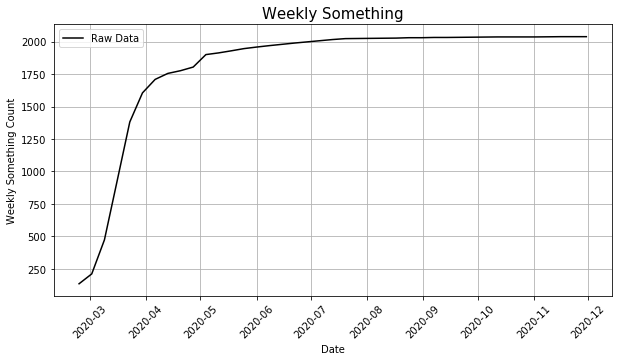

In [28]:
d_ = concat_df_weekly
plt.figure(figsize=(10,5))
plt.title("Weekly Something", fontsize=15)
plt.plot(d_["date"],d_['some_count'], "-", color = 'black',label='Raw Data')
plt.xlabel('Date')
plt.ylabel('Weekly Something Count')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

# MAU (Monthly Unique User) 

In [29]:
concat_df_monthly = concat_df.groupby([pd.Grouper(key='date',freq='M')])[select_column_name].apply(list)
concat_df_monthly = pd.DataFrame(concat_df_monthly).reset_index()
concat_df_monthly

,date,some_column_name
0,2020-02-29,"[Maricopa, Humboldt, Los Angeles, Orange, Sacr..."
1,2020-03-31,"[Maricopa, Alameda, Humboldt, Los Angeles, Mar..."
2,2020-04-30,"[Autauga, Baldwin, Bibb, Blount, Bullock, Butl..."
3,2020-05-31,"[Autauga, Baldwin, Barbour, Bibb, Blount, Bull..."
4,2020-06-30,"[Autauga, Baldwin, Barbour, Bibb, Blount, Bull..."
5,2020-07-31,"[Autauga, Baldwin, Barbour, Bibb, Blount, Bull..."
6,2020-08-31,"[Autauga, Baldwin, Barbour, Bibb, Blount, Bull..."
7,2020-09-30,"[Autauga, Baldwin, Barbour, Bibb, Blount, Bull..."
8,2020-10-31,"[Autauga, Baldwin, Barbour, Bibb, Blount, Bull..."
9,2020-11-30,"[Autauga, Baldwin, Barbour, Bibb, Blount, Bull..."


In [30]:
monthly_something_list= list(concat_df_monthly[select_column_name])
test_count_col = []
for data in monthly_something_list: 
    tmp = len(list(set(data)))
    test_count_col.append(tmp)
concat_df_monthly['some_count'] = test_count_col
concat_df_monthly = concat_df_monthly.drop([select_column_name],axis=1)
concat_df_monthly

,date,some_count
0,2020-02-29,130
1,2020-03-31,1463
2,2020-04-30,1794
3,2020-05-31,1946
4,2020-06-30,1990
5,2020-07-31,2024
6,2020-08-31,2030
7,2020-09-30,2033
8,2020-10-31,2036
9,2020-11-30,2038


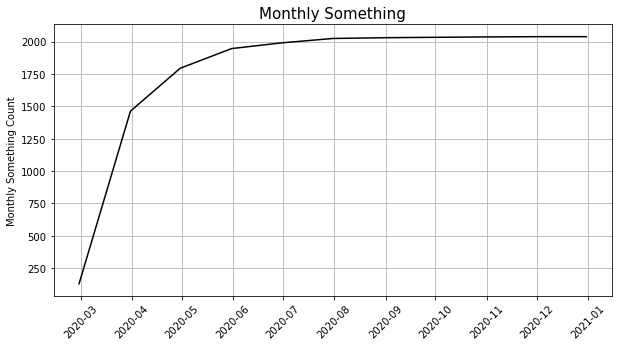

In [31]:
from matplotlib import dates
d_ = concat_df_monthly
plt.figure(figsize=(10,5))
plt.title("Monthly Something", fontsize=15)
plt.plot(d_["date"],d_["some_count"], "-", color = 'black',label='Raw Data')
plt.xticks(rotation=45)
plt.ylabel('Monthly Something Count')
plt.grid()
plt.show()